In [1]:
import csv
import pandas as pd
import datetime 
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
import os
from pandas import DataFrame as df
from matplotlib import mlab
from matplotlib import pyplot as plt

In [2]:
old_df = pd.read_csv('load_and_pv.csv')

In [3]:
# modified CSV
keep_col = ['utc_date','load_kw']
df = old_df[keep_col]
df.to_csv("load_and_pv.csv", index=False)


In [4]:
# Finding out the average power consumed across time-slices 
df['date'], df['Time'] = df['utc_date'].str.split(' ', 1).str
df['utc_date'].str.split(' ', 1, expand=True)

df = df.loc[(df['Time'] > '14:00') & (df['Time'] < '15:00')]


In [5]:
# Select year and select only business days
df['utc_date'] = pd.to_datetime(df['utc_date'])
df['weekday'] = df['utc_date'].dt.dayofweek
df['year'] = df['utc_date'].dt.year

# mon=0, tues=1, wed=2, thu=3, fri=4, sat=5, sun=6
df = df.loc[(df['weekday'] !=5) & (df['weekday'] !=6)]
df = df.loc[df['year'] == 2014]


In [6]:
del df['year']
del df['date']
del df['Time']
del df['weekday']


In [7]:
df['10-10baseline'] = df['load_kw'].shift().rolling(10).mean()


In [8]:
df['3-10baseline'] = df['load_kw'].shift().rolling(10).apply(lambda x: x[np.argsort(x)[-3:]].mean())


In [9]:
# print df

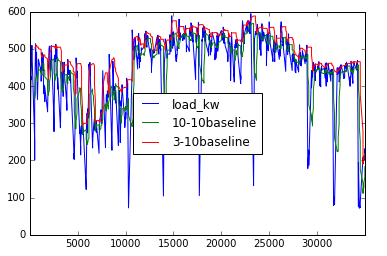

In [10]:
df.plot()
plt.figure(figsize=(20, 2))
plt.show()
# fig.show()

# ax = fig.add_subplot(111)
# ax.plot(df.index, df)